# Project: Investigate a Dataset (Medical Appointment - No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>This dataset collects information from 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
</p> 

<p> It contains a number of characteristics about each person that has an appointment. 
    Characteristics include: 
</p>

<ul>
<li><b>Patient ID</b>
    Identification number of the patient
    </li>
<li><b>Appointment ID</b>
    The identification of each apppointment.
    </li>
<li><b>Gender</b>
    This can be either male or female
    </li>
<li><b>Scheduled Day</b>
    This is the day the appointment was scheduled
    </li>
<li><b>Appointment Day</b>
    This is the actual day of the appointment
    </li>
<li><b>Age</b>
    This is the age of the patient
    </li>
    
<li><b>Neighbourhood</b>
    shows the area where a patient lives.
    </li>
    
<li><b>Scholarship</b>
    This tells us whether they are on <a href ="https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000">Scholarship</a> or not.
    </li>
<li><b>Hypertension</b>
    This indicates whether they are hypertensive or not, 1 for yes, 0 for no.
    </li>
<li><b>Diabetes</b>
    This indicates whether they are diabetic or not, 1 for yes, 0 for no.
    </li>
<li><b>Alcoholism</b>
    This indicates whether they are alcoholic or not, 1 for yes, 0 for no.
    </li>
<li><b>Handcap</b>
    This indicates whether they are handicapped or not.
    </li>
<li><b>SMS_received</b>
    This indicates whether they are hypertensive or not, 1 for yes, 0 for no.
    </li>
<li><b>No_show</b>
    This indicates whether they showed up for the appointment or not.
    No if they showed up,
    Yes if they didn't
    </li>
</ul>

## Questions
<ol>
    <li><a href ="#question1">Which gender is more likely to miss an appoinment?</a></li>
    <li><a href="#question2">What is the age group of those who missed medical appointment?</a></li>
    <li><a href="#question3">Is being on the Scholarship a factor affecting showing up for appointments?</a></li>
    <li><a href="#question4">Did receiving an SMS lead to showing up for Appointments?</a></li>
    <li><a href=#question5>What is the time difference between the Schedule and Appointment Days of People who showed up and those that missed that appointments?</a></li>
</ol>

In [545]:
# importing packages and dataset.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> checking out the data
### General Properties

In [546]:
# loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# view the first few rows.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [547]:
# Checking for the number of contents in our dataset.
df.shape

(110527, 14)

> The dataset has about __110527 rows with 14 columns__ as described in the introduction.

In [548]:
# basic information on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB



>__i__
>
>The column names should be all lower case for consistency and to make it easier to be called when necessary.The column **_No-show_** should also be renamed, the hyphen "-" changed to an underscore"_" for consistency.
>

>__ii__
>
> The **PatientID** and **AppointmentID** columns are **float** and **int** datatypes respectively, since they are both identifiers, they should be strings.

>__iii__
>
>The **ScheduledDay** and **AppointmentDay** columns are strings, from the column information in the introduction they should be **datetime** objects. 
> 
>Also the appointment day should always be later than the schedule day. As the schedule day is when the future appointment day is fixed.
>
> A new column containing the difference between the 2 columns would make it easier to do my analysis on question 5


In [549]:
# summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>__iv__
>
> **Age** has a **minumum** of -1, this is clearly a mistake and rows with age less than one should be handled. 

In [550]:
# checking for null values.
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

>__v__
>
> There are no null values in the dataset. 


> __/------------------------------------------/__
>
> The column that should not have any duplicates is the **AppointmentID** column, since an appointment can not take place twice.
>
> Do we have **any duplicates in the AppointmentID column?**

In [551]:
# checking for duplicated values in a unique identifier.
df['AppointmentID'].duplicated().any()

False

>__vi__
>
>There are __no duplicates in the AppointmentID column.__


### Data Cleaning
> __i.__
>
>**Column Names**. 

In [552]:
# Convert column names to lower case and rename "No-show"
df = df.rename(columns=lambda x:x.lower().replace('-','_'))


# check for column names
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


>__ii. Changing datatypes of patientid and appointmentid__

In [553]:
# changing datatype of columns 
df[['patientid','appointmentid']] = df[['patientid','appointmentid']].astype(str)


# check to confirm datatypes of changed columns.
df.dtypes

patientid         object
appointmentid     object
gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show           object
dtype: object

>__iii. Change schedule and appointment day to datetime data types__
>
>removing columns with appointmentday earlier than schedule day
>
> Creating column with lag between schedule and appointment day

In [554]:
# change the data types to objects. 
columns = ['scheduledday','appointmentday']



for col in columns:
    df[col] = pd.to_datetime(df[col])

    
    
# check for confirmation of the data types.
df[['scheduledday','appointmentday']].dtypes

scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
dtype: object

In [555]:
# checking for erroneous appointments, where appointment day is earlier than scheduled day
erroneous = df[df['appointmentday']<df['scheduledday']]

erroneous.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [556]:
# dropping erroneous rows
df.drop(erroneous.index, inplace=True)

In [557]:
# check for erroneous rows
df[df['appointmentday']<df['scheduledday']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


> There no more erroneous rows.

In [558]:
#  the lag between the appointment and schedule day.
df['lag'] = df['appointmentday']-df['scheduledday']



# check for the column 
df['lag'].head()

5    1 days 15:23:09
6    1 days 08:54:48
7    1 days 08:20:02
9    1 days 11:11:35
10   1 days 09:01:49
Name: lag, dtype: timedelta64[ns]

> We would only take the number of days of the **lag** column, so as to make it easier to work with

In [559]:
# selecting just the days from the dataset
df['lag'] = df['lag'].astype('timedelta64[D]')



# converting the column to int
df['lag'] = df['lag'].astype(int)

In [560]:
# checking to confirm the datatype of the lag column 
df['lag'].dtype

dtype('int32')

> **iv. Handle rows with age less than 0**

In [561]:
# check for number of columns with age less than zero.
df[df['age']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag


In [562]:
# there is only one column with age less than zero so we can drop the column. 
df.drop(index=df[df['age']<0].index, inplace=True, axis=0)

# check if the column has been dropped 
df[df['age']<0]

# column has been dropped succesfully

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag


<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>

### 1.  Which gender is more likely to miss an appoinment?

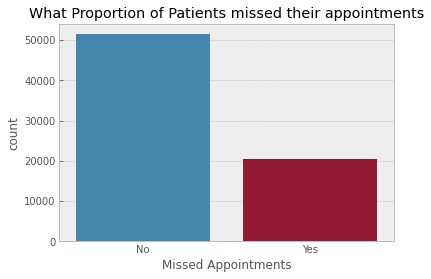

In [563]:
sns.countplot(x='no_show', data=df)
plt.title('What Proportion of Patients missed their appointments')
plt.xlabel('Missed Appointments');

> From the bar plot about **20%** of patients missed their appointments

In [564]:
# population distribution of male and female
gender = df['gender']

gender.value_counts()

F    48070
M    23889
Name: gender, dtype: int64

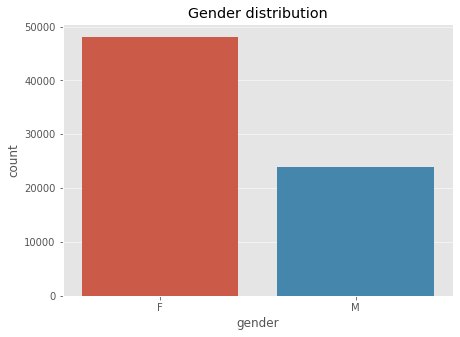

In [565]:
# visualizing the gender distribution.
plt.style.use('ggplot')
plt.figure(figsize=(7,5))

sns.countplot(x='gender', data=df,);
plt.title('Gender distribution');

In [566]:
# Subsetting the gender column of the number of people who missed their appointments 
missed = df[df['no_show']=='Yes']['gender']

# how many people missed their appointments
print(f'{missed.shape[0]} People missed their appointments')

# how many females or males missed their appointments
missed.value_counts()

20522 People missed their appointments


F    13674
M     6848
Name: gender, dtype: int64

> Before making near accurate assumptions, we have to make up for the disproportionate composition of Males and Females in the dataset. So the **percentage compositions** would be used for analysis.

In [567]:
# "missed" and "gender" are already defined in the cells above

# what percentage of males missed their appointments?
male_percent = (missed.value_counts()[1]) /(gender.value_counts()[1])*100

# what percentage of females missed their appointments
female_percent = (missed.value_counts()[0]/gender.value_counts()[0])*100



print(f'males : {male_percent} \nfemales : {female_percent}')

males : 28.66591318179915 
females : 28.44601622633659


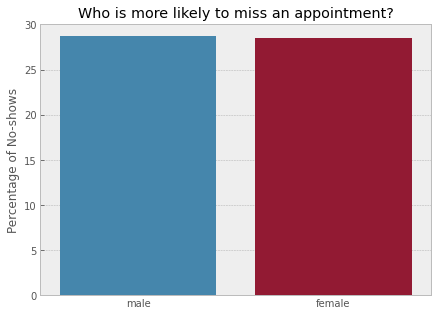

In [568]:
# visualizing the percentage
plt.style.use("bmh")

plt.figure(figsize=(7,5))

sns.barplot(x=["male","female"], y=[male_percent,female_percent]);



# add title and labels
plt.title('Who is more likely to miss an appointment?');
plt.ylabel('Percentage of No-shows');

> **Males and Females almost equally missed their appointments**

> **28.7% of males** missed their appointments

> **28.4% of females** missed their appointments

<a id='question2'></a>

### 2. What is the age group of those who missed medical appointment?

(71959, 15)


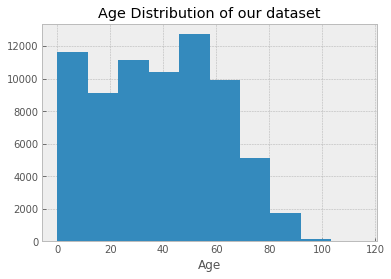

In [569]:
# A distribution of the age group of the dataset.
df['age'].hist()
print(df.shape)
plt.title('Age Distribution of our dataset')
plt.xlabel('Age');

In [570]:
# create a dataframe of patients who didn't have no-shows
df_showedUp = df[df['no_show']=='No']

In [571]:
# create a dataframe of patients who had no-shows
df_noShow = df[df['no_show']=='Yes']

In [572]:
df_showedUp['age'].describe()

count    51437.000000
mean        39.965706
std         23.140047
min          0.000000
25%         21.000000
50%         41.000000
75%         58.000000
max        115.000000
Name: age, dtype: float64

In [573]:
df_noShow['age'].describe()

count    20522.000000
mean        34.835299
std         21.954582
min          0.000000
25%         17.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

> Those who showed up were slightly older than those who didn't.

> Those who **showed up** had a **mean age** of **39.97 years**

>Those who **didn't show up** had a **mean age** of **34.84 years**

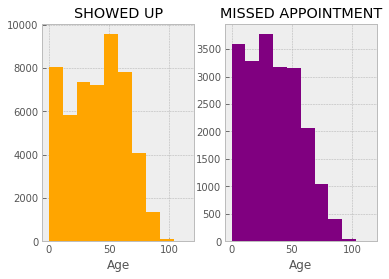

In [574]:
# visualizing the age distribution of people who showed up to their appointments and those who didn't
fig, ax = plt.subplots(1,2)


# Showed Up
ax[0].hist(df_showedUp['age'],color='orange');

ax[0].set_title('SHOWED UP')

ax[0].set_xlabel('Age')



# No-Show
ax[1].hist(df_noShow['age'], color='purple');

ax[1].set_title('MISSED APPOINTMENT')

ax[1].set_xlabel('Age');

<a id='question3'></a>
### 3. Is being on the Scholarship a factor affecting showing up for appointments?

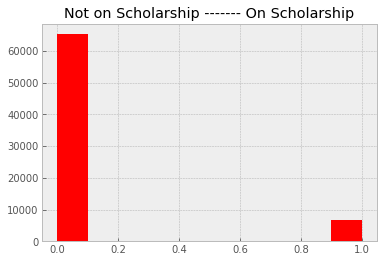

In [575]:
# What proportion of patients are on scholarship
df['scholarship'].hist(color='red')
plt.title('Not on Scholarship ------- On Scholarship');

> From the Histogram above, most of the patients weren't on scholarships

> **Those on Scholarships, were they more likely to show up for appointments?** Let us find out below

(6671, 15)


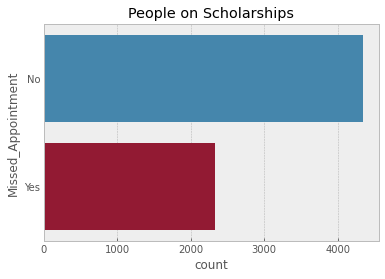

In [576]:
# people on scholarships
df_scholarship=df[df['scholarship']==1]

print(df_scholarship.shape)


# visualising their no-shows.
sns.countplot(y='no_show', data=df_scholarship);
plt.title('People on Scholarships')
plt.ylabel('Missed_Appointment');

(65288, 15)


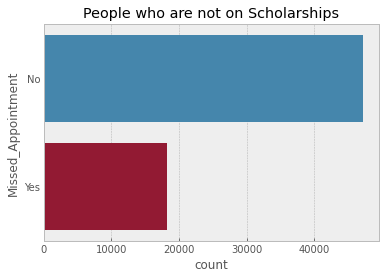

In [577]:
# People who are not on the Scholarship
df_noScholarship = df[df['scholarship']==0]
print(df_noScholarship.shape)

# visualising their no-shows.
sns.countplot(y='no_show', data=df_noScholarship);

# adding title and labels
plt.title('People who are not on Scholarships')
plt.ylabel('Missed_Appointment');

> From the 2 **countplots** above, it's evident that, **patients who were on scholarships were more likely to miss their appointments that people who were not on scholarships**


<a id='question4'></a>
### 4. Did receiving an SMS lead to showing up for Appointments?

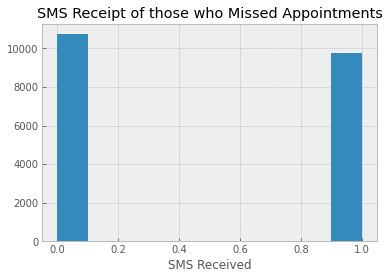

In [578]:
# visualising the SMS receipt of those of those who missed appointments
df_noShow[['sms_received']].hist()

# adding title and labels
plt.title('SMS Receipt of those who Missed Appointments')
plt.xlabel('SMS Received');

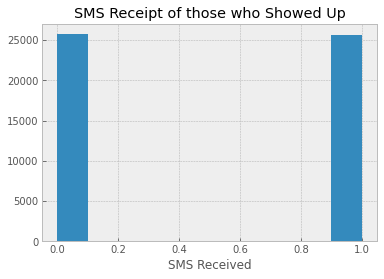

In [579]:
# visualising the SMS receipt of those of those who Showed UP to Appointments
df_showedUp[['sms_received']].hist()

# adding title and labels
plt.title('SMS Receipt of those who Showed Up')
plt.xlabel('SMS Received');

> **Those who missed appointments got less SMS than those who showed up to their appointments**

<a id='question5'></a>
### 5. What is the time difference between the Schedule and Appointment Days of People who showed up and those that missed that appointments?

In [580]:
#  lag in people who showedup
df_showedUp['lag'].describe()

count    51437.000000
mean        14.013142
std         16.404411
min          0.000000
25%          3.000000
50%          7.000000
75%         20.000000
max        178.000000
Name: lag, dtype: float64

> **Mean Lag Days** for those who showed up for their appointmets is 14 days

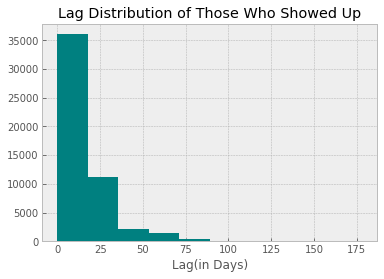

In [581]:
# Distribution of the  lag in people who showed up
df_showedUp['lag'].hist(color='teal')

# adding titles and labels
plt.title('Lag Distribution of Those Who Showed Up')
plt.xlabel('Lag(in Days)');

In [582]:
# Summary of the lag of those who Missed Their Appointments
df_noShow['lag'].describe()

count    20522.000000
mean        16.218254
std         16.613713
min          0.000000
25%          4.000000
50%         12.000000
75%         24.000000
max        178.000000
Name: lag, dtype: float64

> **Mean Lag Day** for those who didn't show up is 16 days.

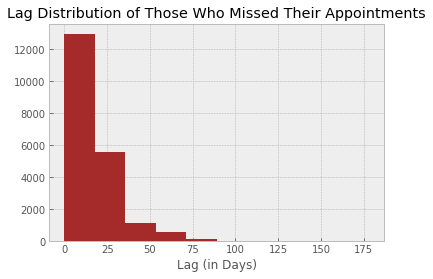

In [583]:
# Distribution of the  lag in people who Missed their appointments
df_noShow['lag'].hist(color='brown')

#  adding titles and labels
plt.title('Lag Distribution of Those Who Missed Their Appointments');
plt.xlabel('Lag (in Days)');

#### LAG DIFFERENCE 

> Even though the maximum lag for both those who showed up and those who didn't are the same, the mean and the standard deviation differed and this is represented in the histograms.

> **Those who Missed their appointments had more lag days than those who didn't miss their appointments.** 
>
> Mean lag days for those who missed is **16 days**
>
>Mean lag days for those who showed up is **14 days**

> There seems to be a correlation, the longer the lag days. the more likely a patient wouldn't keep to their appointment

#### To Further Explore This Assertion:
> The **no-show** column of a copy of our dataset would be converted to integers
>
> **Yes** would become **1**, **No** would become **0**

>The **Correlation Score** would be calculated to confirm the magnitude of the assertion that there is a correlation between the lag and the 

In [584]:
# make a copy of our dataframe 
df_corr = df.copy()

#  encoding for yes and no
df_corr['no_show'] = df_corr['no_show'].replace('Yes', 1)
df_corr['no_show'] = df_corr['no_show'].replace('No', 0)

In [585]:
# changing the datatype to int
df_corr['no_show'].astype(int)

5         0
6         1
7         1
9         0
10        0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: no_show, Length: 71959, dtype: int32

In [586]:
# Calculating the Correlation Score
df_corr.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag
age,1.000000,-0.103038,0.500749,0.284477,0.080350,0.077141,-0.042537,-0.101042,-0.008608
scholarship,-0.103038,1.000000,-0.027764,-0.025417,0.030529,-0.010446,0.020666,0.045687,-0.026177
hipertension,0.500749,-0.027764,1.000000,0.425614,0.085821,0.083643,-0.037065,-0.056859,-0.051121
diabetes,0.284477,-0.025417,0.425614,1.000000,0.024174,0.061513,-0.031219,-0.022412,-0.048246
alcoholism,0.080350,0.030529,0.085821,0.024174,1.000000,0.013501,-0.009095,0.019864,-0.029137
handcap,0.077141,-0.010446,0.083643,0.061513,0.013501,1.000000,-0.022107,-0.007184,-0.015865
sms_received,-0.042537,0.020666,-0.037065,-0.031219,-0.009095,-0.022107,1.000000,-0.020631,0.201789
no_show,-0.101042,0.045687,-0.056859,-0.022412,0.019864,-0.007184,-0.020631,1.000000,0.060362
lag,-0.008608,-0.026177,-0.051121,-0.048246,-0.029137,-0.015865,0.201789,0.060362,1.000000


> The correlation score for the **lag days** shows that the number of lag days is the second highest predictor of the No-Shows. With the second highest **absolute correlation score** with respect to the **No-Shows** of **0.06** 

> Although the correlation score is not sufficient enough to be called a strong predictor of No-Shows, since the highest positive and negative correlations are 1 and -1 respectively. 

<a id='conclusions'></a>
## Conclusions

#### 1. Males and Females almost equally miss their appointments. Males 28.7% of the time while males 28.4%

#### 2. Those who missed their appointments were slightly younger than those who showed up, with the mean ages being 34.84 and 39.97 years respectively

#### 3. Those who were on scholarships were more likely to miss appointments than those who weren't.

#### 4. People who received SMS reminders were more likely to show up on their appointment day

#### 5. Those that set appointment dates farther in the future were more likely to miss their appointments than those who set their own closer.

### List Of References

>http://ipython.org/

>https://www.delftstack.com/howto/python-pandas/pandas-convert-timedelta-to-int/#:~:text=We%20can%20also%20convert%20the,using%20the%20astype()%20attribute.

>https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook#:~:text=First%20open%20a%20markdown%20cell,to%20view%20in%20the%20Notebook.

>https://ispycode.com/Python/Date-And-Time/Timedelta/Create-Timedelta-Object

>https://www.loc.gov/standards/datetime/implementations.html
